# Deep Learning I

## Table of contents

1. Neural Networks

    1.1 Multilayer neural networks

2. Deep Learning in `keras`

    2.1 Keras optimizer

## 1. Neural Networks

Neural nets are a specific method for learning from data, a method that is based on a very simple element, the *neuron unit*. A neuron unit (or 1-layer neural network) is a mathematical function of this kind:

${\mathbf y} = \sigma(\mathbf{w}^T \cdot {\mathbf x} + b)$

where ${\mathbf x}$ represents an input element in vector form, $\mathbf{w}$ is a vector of weights,  $\sigma$ is a non-linear function and $b$ a scalar value. $(\mathbf{w},b)$ are called the parameters of the function. The output of this function is called the *activation* of the neuron. 

Regarding the non-linear function, historically the most common one was the Sigmoid function, but nowadays there are several alternatives that are supposed to be better suited to learning from data, such as ReLU and variants.

> **Question:** What kind of decision functions are represented by a 1-layer nn?

C:\Users\Dan\AppData\Local\Temp\ipykernel_22036\3286874003.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


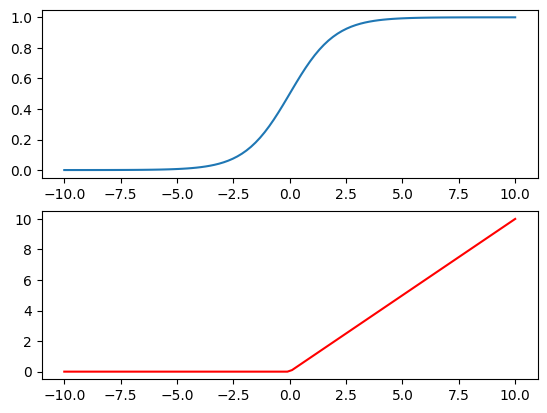

In [13]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return x * (x > 0)

plt.ylim(-1.5, 10)
x = np.linspace(-10.0,10.0,100)
y1 = sigmoid(x)
plt.subplot(2, 1, 1)
plt.plot(x,y1)
y2 = ReLU(x)
plt.subplot(2, 1, 2)
plt.plot(x,y2,'r')

In [14]:
x = np.array([0.4,1.2,3.5])

w = np.array([1.0,2.0,1.0])
b = 1.3

y = sigmoid(np.dot(x,w) + b)

print(y)

0.9994997988929205


## 1.1 Multilayer neural networks

Simple neurons can be organized in larger structures by applying to the same data vector different sets of weights, forming what is called a *layer*, and by stacking layers one on top of the output of the other.  

It is important to notice that a multilayer neural network can be seen as a composition of matrix products (matrices represent weights) and non-linear function activations. For the case of a 2-layer network the outcome is:

$ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$

where ${\mathbf \sigma}$ represents a vectorial version of the sigmoid function and $W^i$ are the weights of each layer in matrix form.  

What is interesting about this kind of structures is that it has been showed that even a neural network with a single hidden layer containing a finite number of neurons can approximate any continuous function of $\mathbf{R}^n$. This fact makes neural networks a sound candidate to implement learning from data methods. The question is then: how to find the optimal parameters, ${\mathbf w} = (W^i,{\mathbf b})$, to approximate a function that is implicitly defined by a set of samples $\{({\mathbf x}_1, {\mathbf y}_1), \dots,  ({\mathbf x}_n, {\mathbf y}_n)\}$?

From a technical point of view, not only neural networks but most of the algorithms that have been proposed to infer models from large data sets are based on the iterative solution of a mathematical problem that involves data and a mathematical model. If there was an analytic solution to the problem, this should be the adopted one, but this is not the case for most of the cases. The techniques that have been designed to tackle these problems are grouped under a field that is called optimization. The most important technique for solving optimization problems is *gradient descend*.

> The training of models like $ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$ (or bigger!) can be readily performed by applying *automatic differentiation* to a loss function. 

> In the case of regression: $L = \frac{1}{n} \sum_{i=1}^n \Big({\mathbf y}_i - {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x}_i + {\mathbf b}^0 \Big) + {\mathbf b}^1 )\Big)\Big)^2 $

> In the case of two-class classification: $L = \frac{1}{n} log(1 + exp(-y_i {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big))) $


## Playing with neural nets.

+ Concentric classes, 1 layer, Sigmoid.
+ Concentric classes, 1 layer, ReLu.
+ X-or, 0 layer.
+ X-or, 1 layer.
+ Spiral data.
+ Regression.


http://playground.tensorflow.org

## 2. Deep Learning in `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top TensorFlow. It was developed with a focus on enabling fast experimentation.

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

```Python
from tensorflow.keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as ``.add()``:

```Python
from tensorflow.keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
```

Once your model looks good, configure its learning process with ``.compile()``:

```Python
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
```

If you need to, you can further configure your optimizer.

```Python
from tensorflow.keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```Python
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
```

Evaluate your performance in one line:
```Python
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
```

Or generate predictions on new data:

```Python
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
```

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name() # checks if TensorFlow can access a GPU on your system

''

In [16]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15029343799397269368
 xla_global_id: -1]

### Load the data

In [17]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

batch_size = 64
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

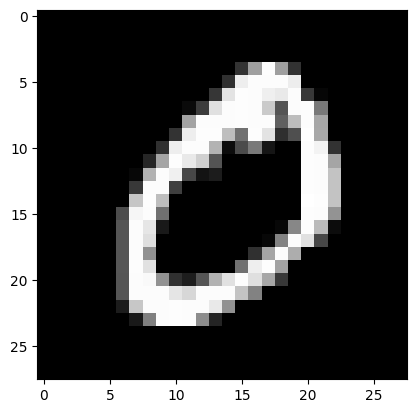

0

(28, 28)

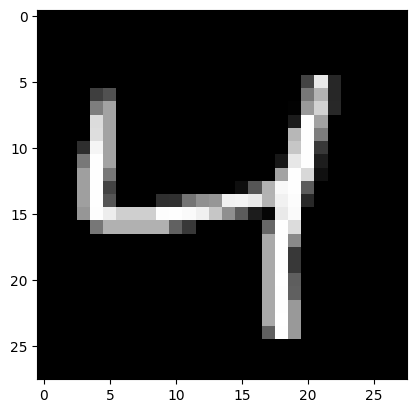

4

(28, 28)

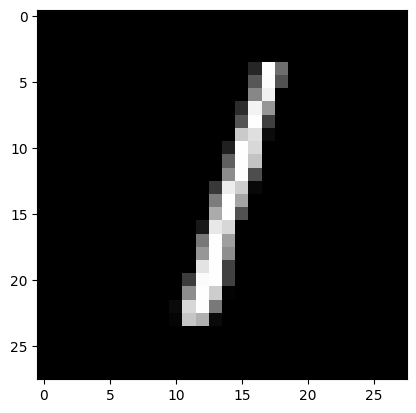

1

(28, 28)

In [18]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = 'gray')
plt.show()
display(y_train[1])
display(x_train[1].shape)

plt.imshow(x_train[2], cmap = 'gray')
plt.show()
display(y_train[2])
display(x_train[2].shape)

plt.imshow(x_test[2], cmap = 'gray')
plt.show()
display(y_test[2])
display(x_test[2].shape)

In [19]:
### Turn all the pixels into features

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_test

60000 train samples
10000 test samples


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the model

In [20]:
from keras.optimizers import Adam


##### Build the model

# Lets build a sequencial model
# model = Sequential([
#    LAYER1 -> Dense(                       -> Dense networks means all neurons in one layer are connected to all neuronsof the next layer
#                    64,                    -> Number of neurons
#                    activation='relu',     -> activation function
#                    input_shape=(784,)),   -> input shape (as it is the first layer)
#                               # 784= 28*28 
#
#    LAYER 2 -> Dense(64, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
#
#    LAYER 3 (output) -> Dense(
#                              10,           -> # of Output Neurons = # of Classes
#                              activation='softmax'),   # Softmax -> Coverts a universe of real numbers into probabilities!!
#                               ])
# How Does Dropout Work?
#
#	•	Random Deactivation: During each training iteration, the Dropout layer randomly “drops out” (sets to zero) a fraction of the neurons in the previous layer. This means these neurons are temporarily ignored during that training pass.
#	•	Dropout Rate: The fraction of neurons to drop is defined by the dropout rate (e.g., 0.2 means 20% of the neurons are dropped).
#	•	Training Different Subnetworks: By dropping different sets of neurons each time, the network effectively trains on different “subnetworks,” which helps it learn more robust features.




model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

#model.add(...)
#model.add(...)
#model.add(...)
#model.add(...)

model.add(Dense(num_classes, activation='softmax'))



model.summary()

# Define the optimizer
#my_opt = Adam(learning_rate=0.001)
my_opt = tensorflow.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=0.1, decay=0.0)

model.compile(loss='categorical_crossentropy',
              
              #optimizer=RMSprop(),
              optimizer = my_opt,  
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,434 (52.48 KB)

 Trainable params: 13,434 (52.48 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Train the model

In [22]:
## IF YOU RUN THIS TWICE; RELOAD THE DATA
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))



Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3780 - loss: 1.7652 - val_accuracy: 0.8517 - val_loss: 0.5989
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7071 - loss: 0.8755 - val_accuracy: 0.8854 - val_loss: 0.4373
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7635 - loss: 0.7326 - val_accuracy: 0.8980 - val_loss: 0.3853
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7876 - loss: 0.6652 - val_accuracy: 0.9025 - val_loss: 0.3516
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8079 - loss: 0.6158 - val_accuracy: 0.9073 - val_loss: 0.3305
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8164 - loss: 0.5857 - val_accuracy: 0.9110 - val_loss: 0.3156
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8255 - loss: 0.5580 - val_accuracy: 0.9137 - val_loss: 0.3047
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8302 - loss: 0.5463 - val_accuracy: 0.

### Evaluate the mode

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2515760064125061
Test accuracy: 0.926800012588501


That’s a solid accuracy for a relatively simple multilayer network on MNIST. Here are a few points to consider if you’d like to improve results further or understand them better:

Network Complexity

Your model has only a couple of hidden layers (16 → 32) with dropout. It’s already at ~92.7% accuracy, which is fairly good.
Typical “benchmark” MNIST models that exceed 98% often have more layers and/or more complex architectures (e.g., convolutional neural networks).
Hyperparameter Tuning

Learning Rate: Try adjusting the learning rate (e.g., 0.001, 0.005, 0.01, etc.).
Batch Size: Test different batch sizes (32, 64, 128).
Number of Epochs: Increasing epochs can help the network converge better.
Dropout Rate

While dropout helps regularize the model and prevent overfitting, you can experiment with different dropout rates (e.g., 0.2, 0.3, 0.5) to see if it gives better performance.
Data Augmentation

Although MNIST is straightforward, data augmentation (slight rotations, shifting, etc.) can occasionally help the model generalize better.
Switching to Convolutional Layers

MNIST is image data, so a Convolutional Neural Network (CNN) typically achieves higher accuracy. Even a simple CNN (e.g., two convolutional layers + pooling) can often hit 98%+ accuracy on MNIST.
Quick Tips
Try More Epochs: If your model hasn’t plateaued, run more epochs.
Monitor Overfitting: Check train vs. test accuracy. If overfitting appears, consider increasing dropout or adding other regularization.
Try Different Optimizers: Adam and RMSprop are popular choices and often converge faster.
Overall, ~92.7% is quite respectable for a simple dense network. If you aim for higher accuracy, consider gradually introducing the adjustments above, especially a switch to CNN layers for image data.

#### Dropout

Dropout is a way to regularize the neural network. During training, it may happen that neurons of a particular layer may always become influenced only by the output of a particular neuron in the previous layer. In that case, the neural network would overfit.

Dropout prevents overfitting and regularizes by randomly cutting the connections (also known as dropping the connection) between neurons in successecutive layers during training.

### 2.1 Keras optimizers



There are several variants of gradient descent, which differ in how we compute the step.

Keras supports seven optimizers.

```python
my_opt = tensorflow.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
my_opt = tensorflow.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
my_opt = tensorflow.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
my_opt = tensorflow.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
my_opt = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_opt = tensorflow.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
my_opt = tensorflow.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
```

#### Momentum

For example, SGD has trouble navigating ravines, i.e., areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector:

$$ v_t = m v_{t-1} + \alpha \nabla_w f $$

$$ w = w - v_t $$

The momentum \( m \) is commonly set to \( 0.9 \).

#### Adagrad

SGD manipulates the learning rate globally and equally for all parameters. Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter.

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

$$ c = c + (\nabla_w f)^2 $$
$$ w = w - \frac{\alpha}{\sqrt{c}} $$